# Dataset Overview
This dataset contains detailed health information for **2,149 patients**, each identified by a unique ID ranging from **4751 to 6900**. The data encompasses demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and an Alzheimer's Disease diagnosis. This dataset is valuable for researchers and data scientists interested in exploring Alzheimer's-related factors, developing predictive models, and conducting statistical analyses.

## Table of Contents
1. [Patient Information](#Patient-Information)
2. [Lifestyle Factors](#Lifestyle-Factors)
3. [Medical History](#Medical-History)
4. [Clinical Measurements](#Clinical-Measurements)
5. [Cognitive and Functional Assessments](#Cognitive-and-Functional-Assessments)
6. [Symptoms](#Symptoms)
7. [Diagnosis Information](#Diagnosis-Information)
8. [Confidential Information](#Confidential-Information)
9. [Citation](#Citation)

---

## 1. Patient Information <a id="Patient-Information"></a>

- **Patient ID**: A unique identifier assigned to each patient (from 4751 to 6900).

### Demographic Details
- **Age**: The age of patients, ranging from **60 to 90** years.
- **Gender**: Gender of the patients, where **0 represents Male** and **1 represents Female**.
- **Ethnicity**: Ethnicity of the patients, encoded as:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- **Education Level**: Education level, encoded as:
  - 0: None
  - 1: High School
  - 2: Bachelor's
  - 3: Higher

---

## 2. Lifestyle Factors <a id="Lifestyle-Factors"></a>

- **BMI**: Body Mass Index, ranging from **15 to 40**.
- **Smoking**: Smoking status, where **0 = No** and **1 = Yes**.
- **Alcohol Consumption**: Weekly alcohol consumption in units, ranging from **0 to 20**.
- **Physical Activity**: Weekly physical activity in hours, ranging from **0 to 10**.
- **Diet Quality**: Diet quality score, ranging from **0 to 10**.
- **Sleep Quality**: Sleep quality score, ranging from **4 to 10**.

---

## 3. Medical History <a id="Medical-History"></a>

- **Family History of Alzheimer’s**: Family history, where **0 = No** and **1 = Yes**.
- **Cardiovascular Disease**: Presence of cardiovascular disease, where **0 = No** and **1 = Yes**.
- **Diabetes**: Presence of diabetes, where **0 = No** and **1 = Yes**.
- **Depression**: Presence of depression, where **0 = No** and **1 = Yes**.
- **Head Injury**: History of head injury, where **0 = No** and **1 = Yes**.
- **Hypertension**: Presence of hypertension, where **0 = No** and **1 = Yes**.

---

## 4. Clinical Measurements <a id="Clinical-Measurements"></a>

- **Systolic BP**: Systolic blood pressure, ranging from **90 to 180 mmHg**.
- **Diastolic BP**: Diastolic blood pressure, ranging from **60 to 120 mmHg**.
- **Cholesterol Total**: Total cholesterol levels, ranging from **150 to 300 mg/dL**.
- **Cholesterol LDL**: Low-density lipoprotein levels, ranging from **50 to 200 mg/dL**.
- **Cholesterol HDL**: High-density lipoprotein levels, ranging from **20 to 100 mg/dL**.
- **Cholesterol Triglycerides**: Triglycerides levels, ranging from **50 to 400 mg/dL**.

---

## 5. Cognitive and Functional Assessments <a id="Cognitive-and-Functional-Assessments"></a>

- **MMSE**: Mini-Mental State Examination score, ranging from **0 to 30** (Lower scores indicate cognitive impairment).
- **Functional Assessment**: Functional assessment score, ranging from **0 to 10** (Lower scores indicate greater impairment).
- **Memory Complaints**: Memory complaints, where **0 = No** and **1 = Yes**.
- **Behavioral Problems**: Behavioral problems, where **0 = No** and **1 = Yes**.
- **ADL (Activities of Daily Living)**: Score ranging from **0 to 10** (Lower scores indicate greater impairment).

---

## 6. Symptoms <a id="Symptoms"></a>

- **Confusion**: Presence of confusion, where **0 = No** and **1 = Yes**.
- **Disorientation**: Presence of disorientation, where **0 = No** and **1 = Yes**.
- **Personality Changes**: Presence of personality changes, where **0 = No** and **1 = Yes**.
- **Difficulty Completing Tasks**: Difficulty in task completion, where **0 = No** and **1 = Yes**.
- **Forgetfulness**: Forgetfulness, where **0 = No** and **1 = Yes**.

---

## 7. Diagnosis Information <a id="Diagnosis-Information"></a>

- **Diagnosis**: Diagnosis status for Alzheimer's Disease, where **0 = No** and **1 = Yes**.

---

## 8. Confidential Information <a id="Confidential-Information"></a>

- **Doctor in Charge**: Confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

---

## 9. Citation <a id="Citation"></a>

```plaintext
@misc{rabie_el_kharoua_2024,
  title={Alzheimer's Disease Dataset},
  url={https://www.kaggle.com/dsv/8668279},
  DOI={10.34740/KAGGLE/DSV/8668279},
  publisher={Kaggle},
  author={Rabie El Kharoua},
  year={2024}
}


# Imports

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gathering Data
### Initial Overview of the Data

Upon the initial examination of the dataset, we observe a total of **2149 unique patients** and **35 different features**, which are categorized under the following headings:

- **Patient Information**
- **Medical History**
- **Demographic Details**
- **Lifestyle Factors**
- **Clinical Measurements**
- **Cognitive and Functional Assessments**
- **Symptoms**
- **Diagnosis Information**
- **Confidential Information**

While most of these features provide valuable information for the analysis and model building process, the **PatientID** and **DoctorInCharge** columns will be removed during the Data Cleaning phase, as they do not contribute meaningful information to the models. **PatientID** serves only as a unique identifier for patients, and **DoctorInCharge** contains confidential information, with all values being "XXXConfid". Removing these columns ensures that the model focuses on relevant features.

In [209]:
df = pd.read_csv("data/alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [210]:
df.shape

(2149, 35)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [212]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


# Data Cleaning: Checking for Missing Values and Duplicate Rows

## Checking for Missing Data

During the data cleaning process, I found no missing or duplicate values. Considering the features, I decided to remove the **PatientID** and **DoctorInCharge** columns, as they do not provide predictive value for the models to be built later. **PatientID** is a unique identifier, and **DoctorInCharge** contains confidential information with the value "XXXConfid" for all patients. Removing them ensures the models focus on meaningful features.

In [213]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [214]:
df.isnull().sum().sum()

0

## Checking For Duplicate Rows

In [215]:
df.duplicated().any()

False

In [216]:
df[df.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


## Dropping Unnecesary Columns

In [217]:
df.drop(["PatientID", "DoctorInCharge"], axis=1, inplace=True)
df.shape

(2149, 33)

# Exploratory Data Analysis
Upon examining the data, we can observe that the dataset is well-prepared in terms of data types. Most columns have been correctly assigned appropriate data types.

However, since I know that the **Ethnicity** column, which is currently represented as an integer, is a nominal variable, I will convert it into string values for better categorization. This is necessary because I plan to apply **One-Hot Encoding** later in the modeling process.

On the other hand, the **Education Level** column is an ordinal variable, where the order of the values carries importance. Therefore, I will keep it in its current integer format, as this representation is appropriate for ordinal data.

In [218]:
df.Ethnicity = df.Ethnicity.replace({0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"})

- A total of **1389 patients** have not been diagnosed with Alzheimer's, while **760 patients** have been diagnosed with the disease. The patients diagnosed as Alzheimer positive represent **35.4%** of the total patients in the dataset.

In [219]:
df.Diagnosis.value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

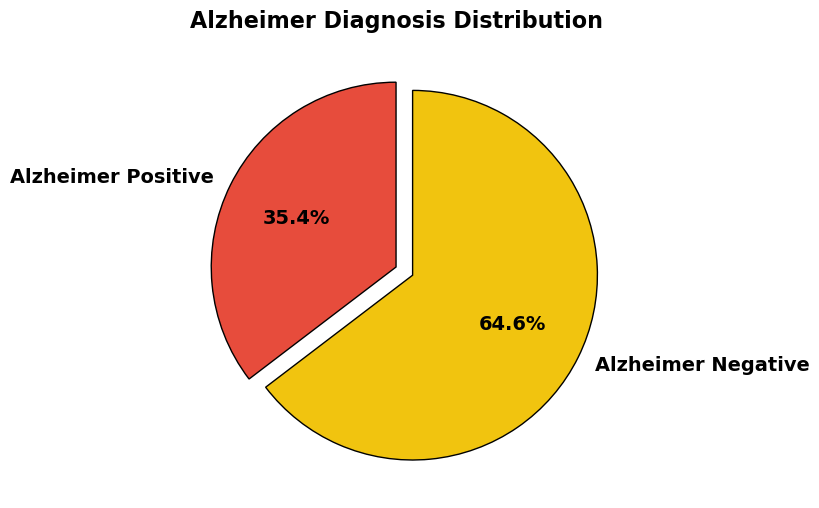

In [220]:
num_non_alzheimer_cases = df.Diagnosis.value_counts()[0]
num_alzheimer_cases = df.Diagnosis.value_counts()[1]

category_names = ["Alzheimer Positive", "Alzheimer Negative"]
sizes = [num_alzheimer_cases, num_non_alzheimer_cases]
custom_colors = ["#e74c3c", "#f1c40f"]

plt.figure(figsize=(6, 6))

plt.title("Alzheimer Diagnosis Distribution", fontsize=16, weight="bold")
plt.pie(sizes, 
        labels=category_names, 
        textprops={"fontsize": 14, "weight": "bold"},
        startangle=90, 
        autopct="%1.1f%%",
        colors=custom_colors, 
        explode=[0, 0.1],
        wedgeprops={"edgecolor": "black", "linewidth": 1})
plt.show()

---
The following `for loop` provides a rough overview of how categorical features relate to Alzheimer's diagnosis. From this initial analysis, a few interesting variables will be selected for further investigation in the following sections.

In [221]:
# Split Columns as numeric and category
numerical_columns = [col for col in df.columns if df[col].dtype in ["int64", "float64"] and df[col].nunique() > 20]
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [222]:
for column in categorical_columns[:-1]:
    crosstab = pd.crosstab(df[column], df.Diagnosis, normalize="index") * 100
    crosstab.columns = ["Alzheimer Negative", "Alzheimer Positive"]
    print(f"Crosstab for {column} vs Diagnosis:\n")
    display(crosstab)
    print('\n' + '-'*50 + '\n')

Crosstab for Gender vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Gender,,
0,63.619227,36.380773
1,65.625000,34.375000



--------------------------------------------------

Crosstab for Ethnicity vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Ethnicity,,
African American,67.841410,32.158590
Asian,59.223301,40.776699
Caucasian,63.771518,36.228482
Other,68.246445,31.753555



--------------------------------------------------

Crosstab for EducationLevel vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
EducationLevel,,
0,60.986547,39.013453
1,64.637002,35.362998
2,65.880503,34.119497
3,68.544601,31.455399



--------------------------------------------------

Crosstab for Smoking vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Smoking,,
0,64.486593,35.513407
1,65.000000,35.000000



--------------------------------------------------

Crosstab for FamilyHistoryAlzheimers vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
FamilyHistoryAlzheimers,,
0,63.721220,36.278780
1,67.343173,32.656827



--------------------------------------------------

Crosstab for CardiovascularDisease vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
CardiovascularDisease,,
0,65.252855,34.747145
1,60.967742,39.032258



--------------------------------------------------

Crosstab for Diabetes vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Diabetes,,
0,64.000000,36.000000
1,68.209877,31.790123



--------------------------------------------------

Crosstab for Depression vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Depression,,
0,64.493597,35.506403
1,65.197216,34.802784



--------------------------------------------------

Crosstab for HeadInjury vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
HeadInjury,,
0,64.307692,35.692308
1,67.839196,32.160804



--------------------------------------------------

Crosstab for Hypertension vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Hypertension,,
0,65.336249,34.663751
1,60.625000,39.375000



--------------------------------------------------

Crosstab for MemoryComplaints vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
MemoryComplaints,,
0,72.150411,27.849589
1,36.017897,63.982103



--------------------------------------------------

Crosstab for BehavioralProblems vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
BehavioralProblems,,
0,69.260486,30.739514
1,39.762611,60.237389



--------------------------------------------------

Crosstab for Confusion vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Confusion,,
0,64.168618,35.831382
1,66.439909,33.560091



--------------------------------------------------

Crosstab for Disorientation vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Disorientation,,
0,64.123825,35.876175
1,67.352941,32.647059



--------------------------------------------------

Crosstab for PersonalityChanges vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
PersonalityChanges,,
0,64.219178,35.780822
1,66.975309,33.024691



--------------------------------------------------

Crosstab for DifficultyCompletingTasks vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
DifficultyCompletingTasks,,
0,64.823009,35.176991
1,63.636364,36.363636



--------------------------------------------------

Crosstab for Forgetfulness vs Diagnosis:



,Alzheimer Negative,Alzheimer Positive
Forgetfulness,,
0,64.623584,35.376416
1,64.660494,35.339506



--------------------------------------------------



---
### Impact of Education Level on Alzheimer's Diagnosis

The analysis reveals that **education level** may play a significant role in predicting Alzheimer's diagnosis:

- **Patients with no education (39%)** and **high school graduates (35%)** show higher proportions of Alzheimer's diagnoses.
- **Higher education levels**, such as Bachelor's or above, are associated with lower diagnosis rates (around **31-34%**).
- The dataset contains more patients from lower education groups, which might lead the model to place more weight on these groups when making predictions.

The model is likely to consider **lower education levels** as a key indicator of Alzheimer's diagnosis. However, it's essential to balance this with other important features to avoid bias in the predictions.

In [223]:
education_labels = ["None", "Highschool", "Bachelor's", "Higher"]
education_impact_on_alzheimer = df.groupby("EducationLevel")["Diagnosis"].agg(["size", "sum", "mean"])
education_impact_on_alzheimer.index = education_labels
education_impact_on_alzheimer

,size,sum,mean
None,446,174,0.390135
Highschool,854,302,0.353630
Bachelor's,636,217,0.341195
Higher,213,67,0.314554


In [224]:
df.groupby(["EducationLevel", "Diagnosis"]).size().unstack()

Diagnosis,0,1
EducationLevel,,
0,272,174
1,552,302
2,419,217
3,146,67


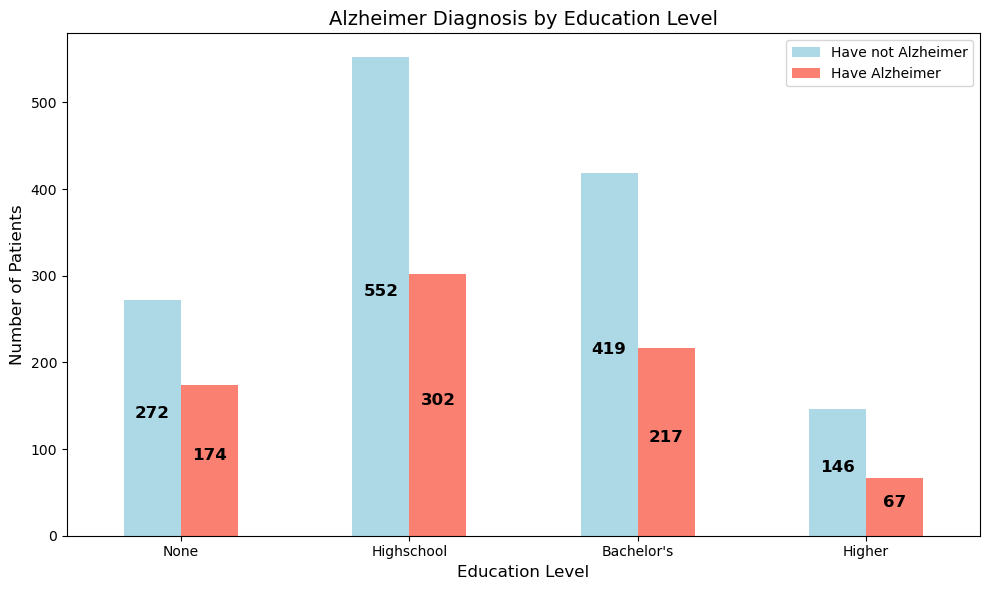

In [225]:
alzheimer_by_education_level = df.groupby(["EducationLevel", "Diagnosis"]).size().unstack()
alzheimer_by_education_level.index = education_labels
bars = alzheimer_by_education_level.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], figsize=(10,6))

plt.title("Alzheimer Diagnosis by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.legend(["Have not Alzheimer", "Have Alzheimer"], loc="best")

plt.xticks(rotation=0)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height/2, int(height), ha="center", color="black", weight="bold", fontsize=12)

plt.tight_layout()
plt.show()

---
### Summary of Alzheimer's Diagnosis by Ethnicity and Gender

- **Ethnicity and Alzheimer's Diagnosis**:
  - **Asian individuals** have the highest proportion of Alzheimer's diagnoses, with approximately **40.8%** of individuals diagnosed.
  - **Caucasian individuals** also show a relatively high diagnosis rate, with **36.2%** diagnosed.
  - **African American** and **Other ethnicities** have slightly lower diagnosis rates, with **32.2%** and **31.8%** respectively.
  - In terms of absolute numbers, **Caucasian patients** make up the largest share of diagnosed Alzheimer's cases, accounting for **60.9%** of the total diagnosed patients.
    
<br>

- **Gender Distribution**:
  - The diagnosis rates between **male** and **female** patients are relatively close, showing no significant gender-based discrepancy in the dataset. Both genders appear to be nearly equally affected by Alzheimer's, suggesting that gender might not play a critical role in predicting diagnosis in this particular dataset.

According to observations  **ethnicity** may be an important feature to consider in predicting Alzheimer's diagnosis. However, **gender**, due to its relatively equal distribution between diagnosed and non-diagnosed patients, may have a smaller impact on the model's predictive power. Further investigation incorporating other factors such as age, medical history, and lifestyle is recommended to build a more robust predictive model.


In [226]:
ethnicity_gender_impact_on_alzheimer = df.groupby(["Ethnicity", "Gender"])["Diagnosis"].agg(["mean", "sum", "size"])

ethnicity_gender_impact_on_alzheimer.index = ethnicity_gender_impact_on_alzheimer.index.set_levels(
    ethnicity_gender_impact_on_alzheimer.index.levels[1].map({0: 'Male', 1: 'Female'}), level=1)

ethnicity_gender_impact_on_alzheimer

mean  sum  size
Ethnicity        Gender                     
African American Male    0.321429   72   224
                 Female  0.321739   74   230
Asian            Male    0.410526   39    95
                 Female  0.405405   45   111
Caucasian        Male    0.378165  239   632
                 Female  0.346749  224   646
Other            Male    0.327273   36   110
                 Female  0.306931   31   101

In [227]:
df.groupby("Ethnicity")["Diagnosis"].agg(["mean", "sum", "size"]).sort_values("mean", ascending=False)

,mean,sum,size
Ethnicity,,,
Asian,0.407767,84,206
Caucasian,0.362285,463,1278
African American,0.321586,146,454
Other,0.317536,67,211


In [228]:
alzheimers_df = df[df['Diagnosis'] == 1]
ethnicity_percentage = alzheimers_df['Ethnicity'].value_counts(normalize=True) * 100
ethnicity_percentage.to_frame()

,proportion
Ethnicity,
Caucasian,60.921053
African American,19.210526
Asian,11.052632
Other,8.815789


In [229]:
ethnicity_counts = df.Ethnicity.value_counts()
ethnicity_counts

Ethnicity
Caucasian           1278
African American     454
Other                211
Asian                206
Name: count, dtype: int64

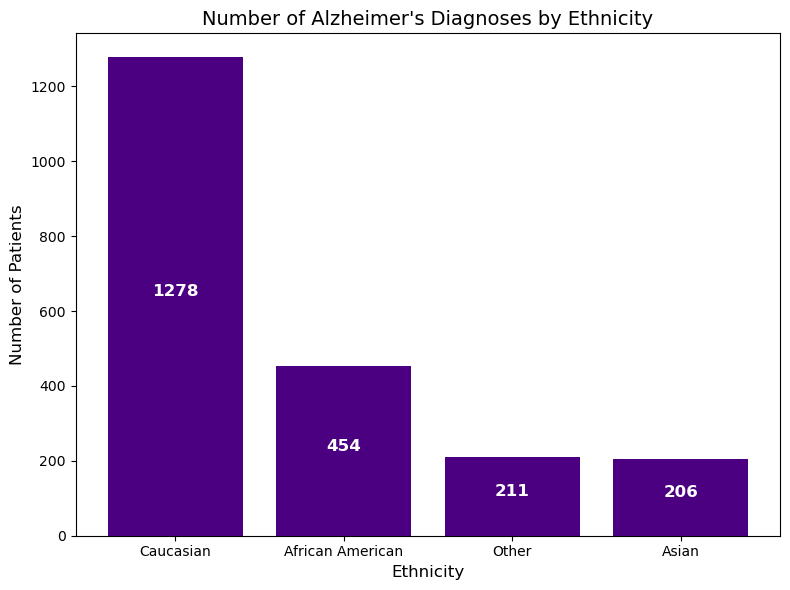

In [230]:
plt.figure(figsize=(8,6))
bars = plt.bar(ethnicity_counts.index, ethnicity_counts.values, color="indigo")

plt.title("Number of Alzheimer's Diagnoses by Ethnicity", fontsize=14)
plt.xlabel("Ethnicity", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Adding the count values to the middle of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height / 2, int(height), ha="center", color="white", weight="bold", fontsize=12)

plt.tight_layout()
plt.show()

---
### Summary of Alzheimer's Diagnosis by Familiy History
- **Without Family History**: 
  - **64%** are not diagnosed with Alzheimer's.
  - **36%** are diagnosed.

- **With Family History**: 
  - **67%** are not diagnosed with Alzheimer's.
  - **33%** are diagnosed.

While family history has some impact, the proportions of Alzheimer's diagnosis are fairly similar between the two groups, which means that family history alone may not be a strong predictor in this dataset.

In [231]:
df.groupby("FamilyHistoryAlzheimers")["Diagnosis"].agg(["size", "sum", "mean"])

,size,sum,mean
FamilyHistoryAlzheimers,,,
0,1607,583,0.362788
1,542,177,0.326568


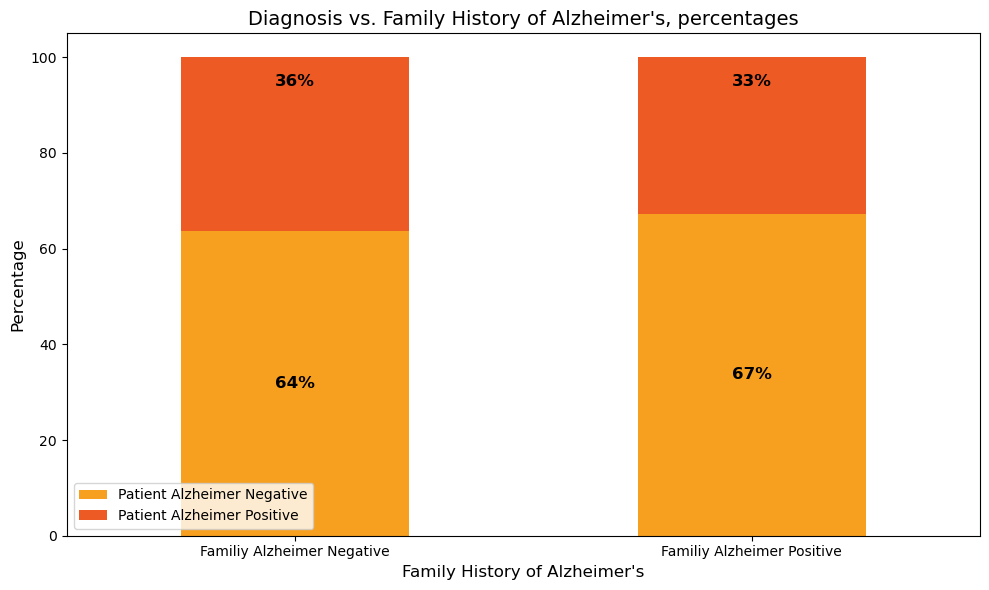

In [232]:
crosstab = pd.crosstab(df.FamilyHistoryAlzheimers, df.Diagnosis, normalize="index") * 100
crosstab.columns = ["Patient Alzheimer Negative", "Patient Alzheimer Positive"]
crosstab.index = ["Familiy Alzheimer Negative", "Familiy Alzheimer Positive"]

ax = crosstab.plot(kind="bar", stacked=True, color=["#F79F1F", "#EE5A24"], figsize=(10, 6))

plt.title("Diagnosis vs. Family History of Alzheimer's, percentages", fontsize=14)
plt.xlabel("Family History of Alzheimer's", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=0)


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        position = p.get_y() + height / 2 if p.get_y() == 0 else p.get_y() + height - 5
        ax.annotate(f'{height:.0f}%', 
                    (p.get_x() + p.get_width() / 2., position),
                    ha="center", va="center", color="black", fontsize=12, weight="bold")
        
plt.tight_layout()
plt.legend(loc="best")
plt.show()

---

In [233]:
# Patients who have alzheimer
alzheimer_df = df[df.Diagnosis == 1]

### Memory Complaints vs Alzheimer Diagnosis

The analysis reveals that among patients who answered "yes" to the Memory Complaints question, approximately 64% have been diagnosed with Alzheimer's, while 36% have not received such a diagnosis. This indicates a significant association between reporting memory complaints and the likelihood of being diagnosed with Alzheimer's.

Moreover, 37.6% of all Alzheimer-diagnosed patients reported memory complaints, meaning the majority (62.4%) of diagnosed patients did not report such issues. 

In conclusion, the Memory Complaints feature demonstrates considerable predictive value for Alzheimer's diagnosis and should be treated as a key variable in any predictive model. Its inclusion in the model is likely to enhance the accuracy of predictions related to Alzheimer's diagnosis.

In [234]:
df.groupby("MemoryComplaints")["Diagnosis"].agg(["size", "sum", "mean"])

,size,sum,mean
MemoryComplaints,,,
0,1702,474,0.278496
1,447,286,0.639821


In [235]:
memory_complaints_crostab = pd.crosstab(df.MemoryComplaints, df.Diagnosis, normalize="index")
memory_complaints_crostab

Diagnosis,0,1
MemoryComplaints,,
0,0.721504,0.278496
1,0.360179,0.639821


In [236]:
memory_complaints_posalz_distribution = alzheimer_df.MemoryComplaints.value_counts(normalize=True)
memory_complaints_posalz_distribution

MemoryComplaints
0    0.623684
1    0.376316
Name: proportion, dtype: float64

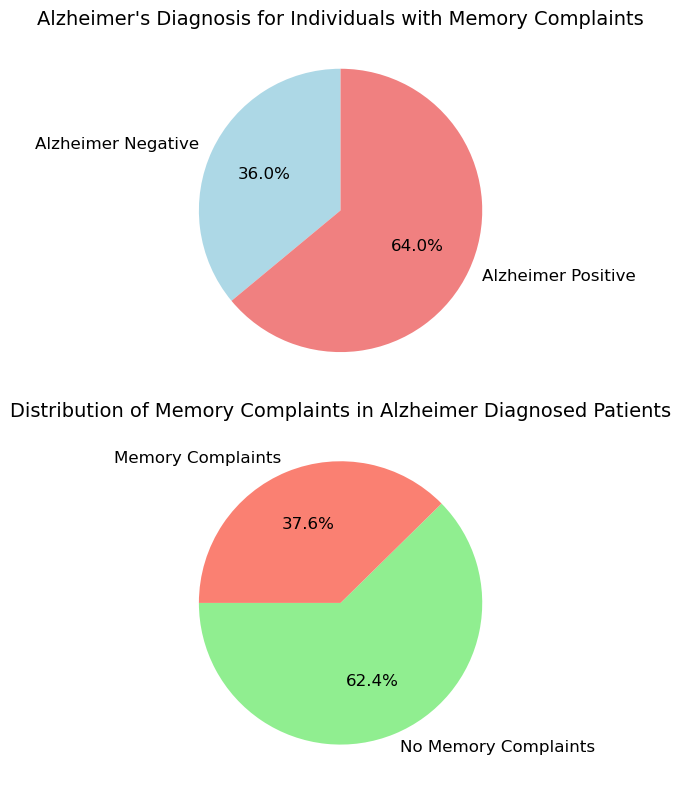

In [237]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.title("Alzheimer's Diagnosis for Individuals with Memory Complaints", fontsize=14)
plt.pie(memory_complaints_crostab.loc[1], labels=["Alzheimer Negative", "Alzheimer Positive"], autopct="%1.1f%%", 
        colors=["lightblue", "lightcoral"], startangle=90, textprops={"fontsize": 12})

plt.subplot(2, 1, 2)
plt.title("Distribution of Memory Complaints in Alzheimer Diagnosed Patients", fontsize=14)
plt.pie(memory_complaints_posalz_distribution, labels=["No Memory Complaints", "Memory Complaints"], autopct="%1.1f%%", 
        colors=["lightgreen", "salmon"], startangle=180, textprops={"fontsize": 12})

plt.tight_layout()
plt.show()

---
### BehavioralProblems vs Alzheimer Diagnosis

The analysis reveals that among patients who answered "yes" to the Behavioral Problems question, approximately 60.2% have been diagnosed with Alzheimer's, while 39.8% have not received such a diagnosis.

Moreover, 37.6% of all Alzheimer-diagnosed patients reported behavioral problems, meaning the majority (62.4%) of diagnosed patients did not report such issues.

The Behavioral Problems feature demonstrates predictive value for Alzheimer's diagnosis, but given the distribution, it should be considered alongside other features in a predictive model. Its inclusion may enhance the model’s accuracy in predicting Alzheimer's diagnosis, but it is not a standalone determinant.

In [238]:
df.groupby("BehavioralProblems")["Diagnosis"].agg(["size", "sum", "mean"])

,size,sum,mean
BehavioralProblems,,,
0,1812,557,0.307395
1,337,203,0.602374


In [239]:
behavioral_problems_crostab = pd.crosstab(df.BehavioralProblems, df.Diagnosis, normalize="index")
behavioral_problems_crostab

Diagnosis,0,1
BehavioralProblems,,
0,0.692605,0.307395
1,0.397626,0.602374


In [240]:
behavioral_problems_posalz_distribution = alzheimer_df.BehavioralProblems.value_counts(normalize=True)
behavioral_problems_posalz_distribution

BehavioralProblems
0    0.732895
1    0.267105
Name: proportion, dtype: float64

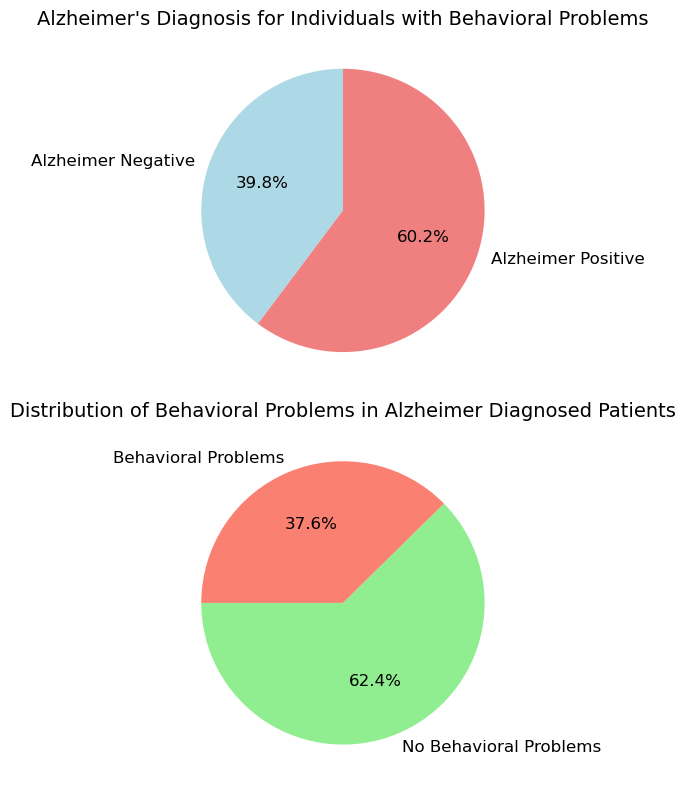

In [241]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.title("Alzheimer's Diagnosis for Individuals with Behavioral Problems", fontsize=14)
plt.pie(behavioral_problems_crostab.loc[1], labels=["Alzheimer Negative", "Alzheimer Positive"], autopct="%1.1f%%", 
        colors=["lightblue", "lightcoral"], startangle=90, textprops={"fontsize": 12})

plt.subplot(2, 1, 2)
plt.title("Distribution of Behavioral Problems in Alzheimer Diagnosed Patients", fontsize=14)
plt.pie(memory_complaints_posalz_distribution, labels=["No Behavioral Problems", "Behavioral Problems"], autopct="%1.1f%%", 
        colors=["lightgreen", "salmon"], startangle=180, textprops={"fontsize": 12})

plt.tight_layout()
plt.show()

---
### Forgetfulness vs Alzheimer Diagnosis

Contrary to expectations, forgetfulness was not strongly associated with higher rates of Alzheimer’s in this dataset. Several factors may explain why forgetfulness did not emerge as a strong predictor of Alzheimer’s:

1. **Nonspecific Symptom**: Forgetfulness is a common symptom that can result from various factors unrelated to Alzheimer's, such as stress, aging, or other health conditions. Its nonspecific nature means it may not serve as a reliable indicator of Alzheimer’s in its early stages.

2. **Other More Prominent Symptoms**: Symptoms like **disorientation, confusion, or personality changes** may be more noticeable early on, making them stronger predictors than forgetfulness.

3. **Later-stage Relevance**: Forgetfulness might become more relevant in the later stages of Alzheimer’s, while other symptoms dominate the early stages of the disease.

4. **Underreporting**: Forgetfulness could be **underreported**, as patients may not always recognize or acknowledge memory issues, especially in the early stages of cognitive decline.

5. **Variable Disease Progression**: Alzheimer’s presents differently across individuals. For some, forgetfulness may emerge later in the disease, while for others, it may appear earlier.

These factors likely explain why forgetfulness alone was not a strong predictor in this dataset and should be considered alongside other cognitive symptoms to add more value in predicting Alzheimer’s.


In [242]:
df.groupby("Forgetfulness")["Diagnosis"].agg(["size", "sum", "mean"])

,size,sum,mean
Forgetfulness,,,
0,1501,531,0.353764
1,648,229,0.353395


In [243]:
pd.crosstab(df.Forgetfulness, df.Diagnosis, normalize="index") * 100

Diagnosis,0,1
Forgetfulness,,
0,64.623584,35.376416
1,64.660494,35.339506


In [244]:
alzheimer_df.Forgetfulness.value_counts(normalize=True)

Forgetfulness
0    0.698684
1    0.301316
Name: proportion, dtype: float64

---
### Numerical Data Distribution Analysis

Upon analyzing the histograms, it can be observed that the numerical features exhibit distributions close to **uniform**. The data points are spread relatively evenly across the ranges, indicating that no particular value range dominates the distribution. Additionally, it can be stated that **no significant outliers** are present in the data, as the distributions do not show any extreme deviations. This suggests that the numerical data is well-distributed and suitable for further analysis.

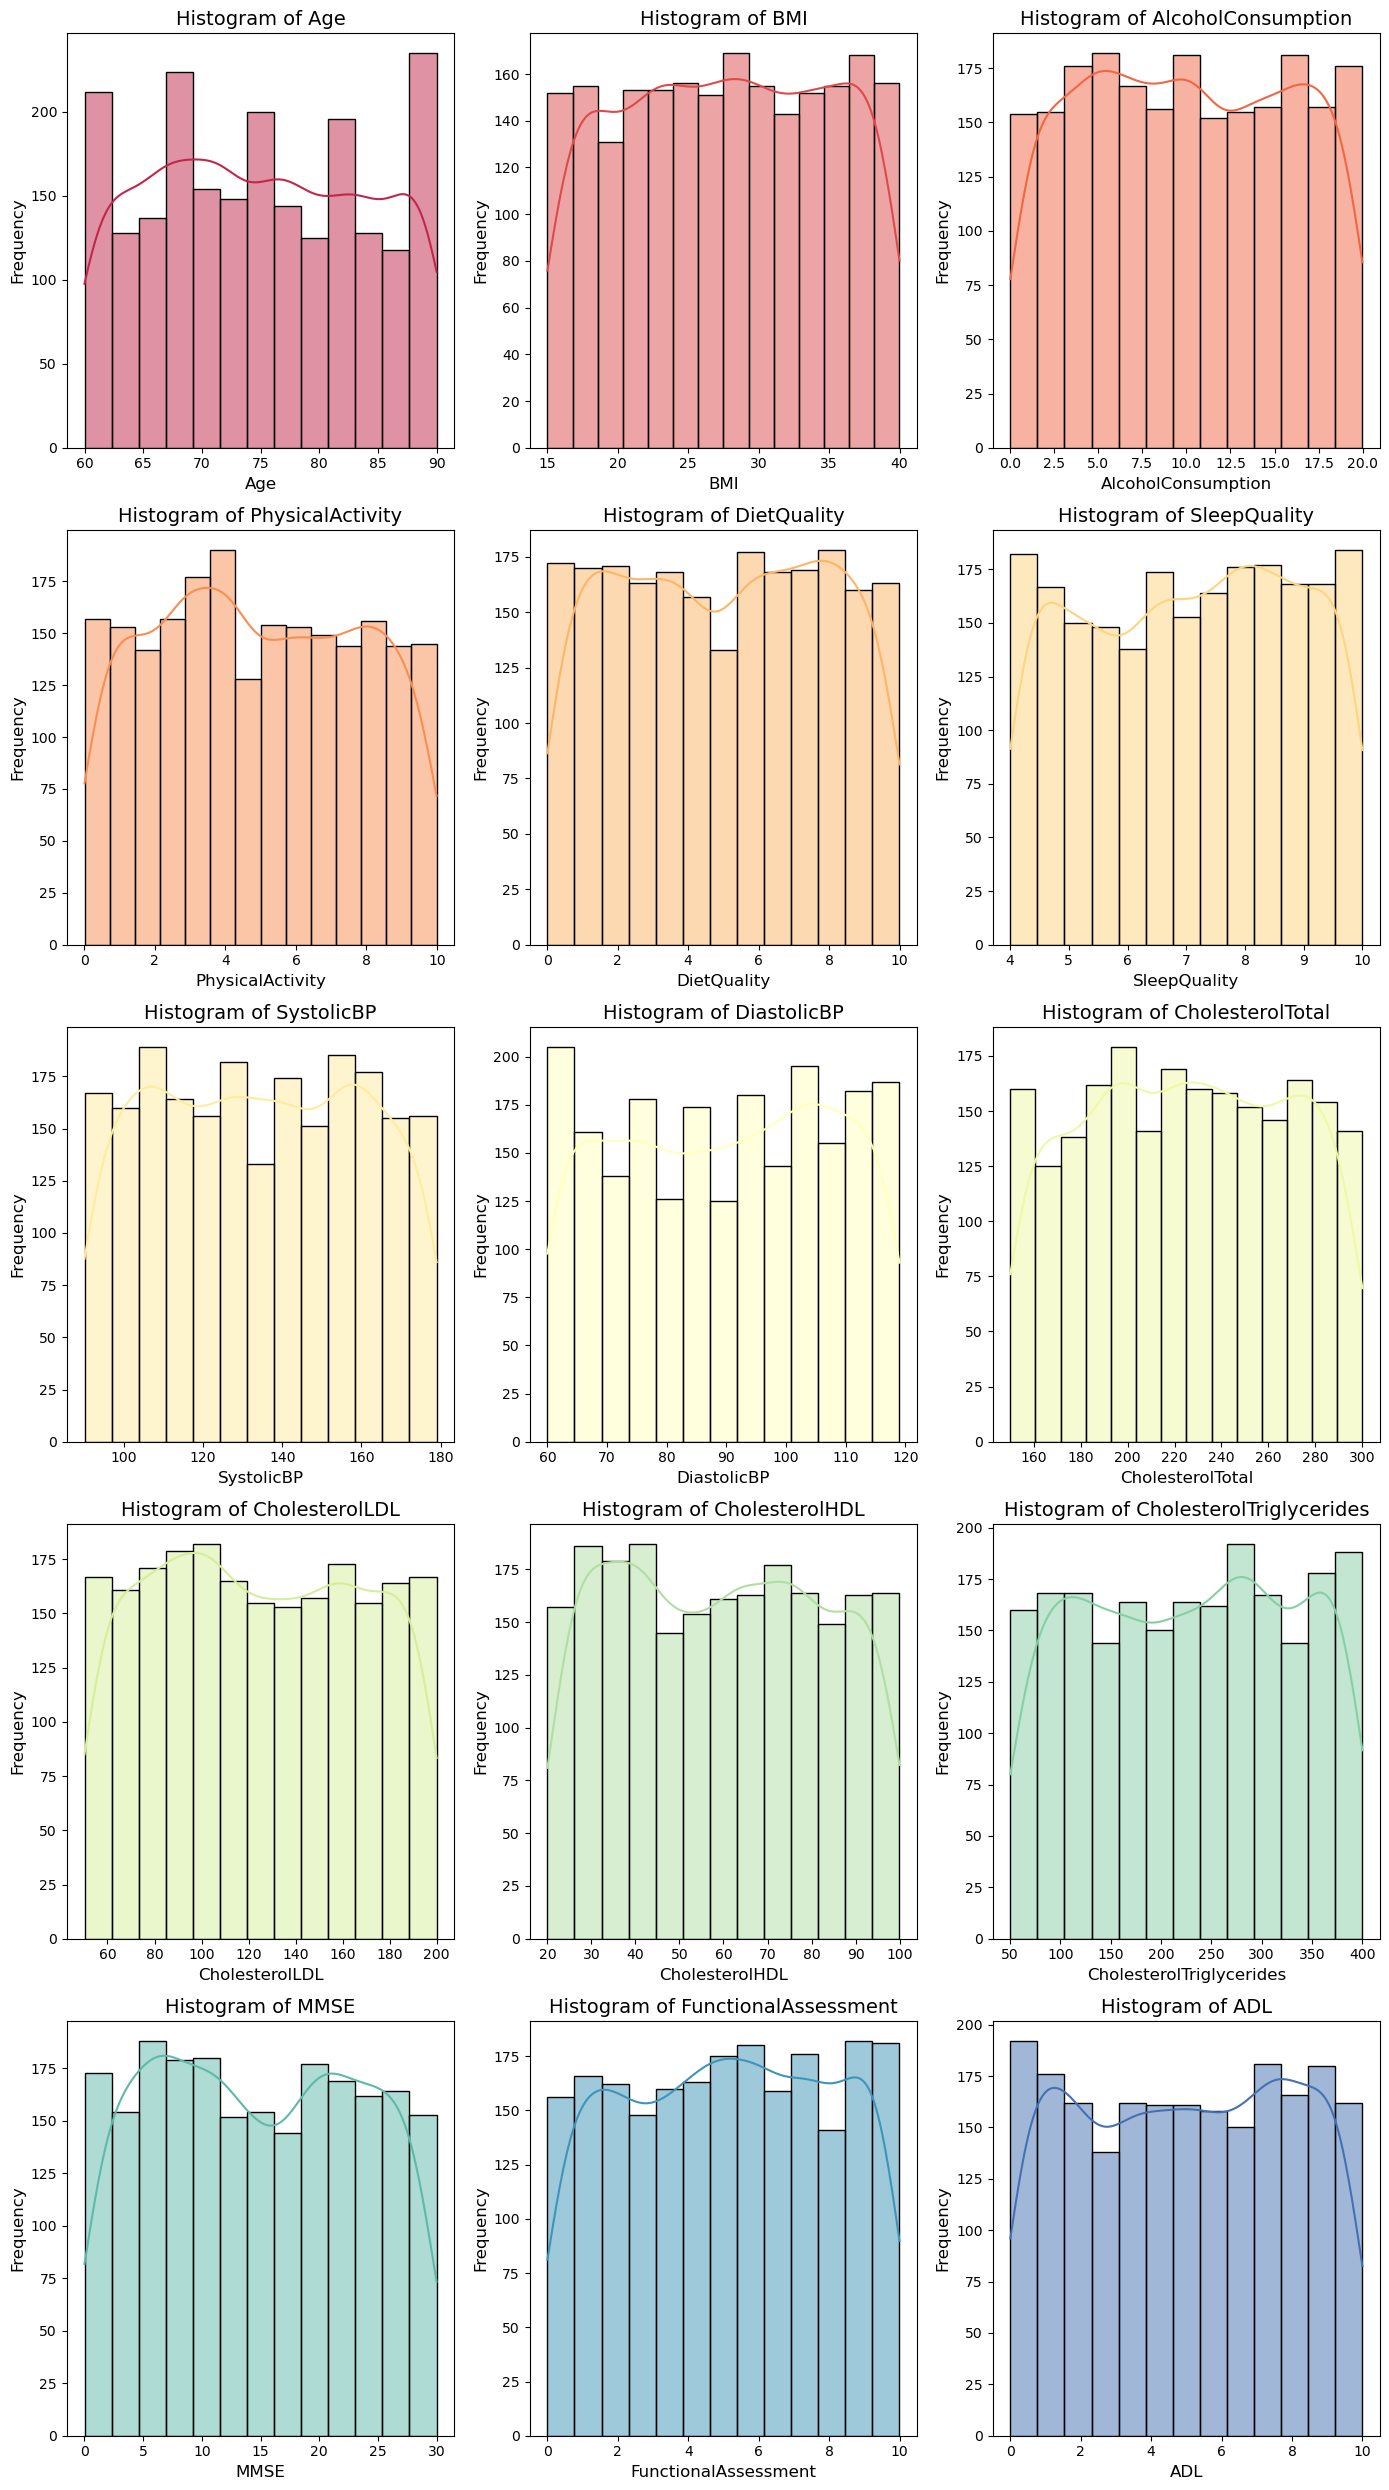

In [245]:
number_of_rows =  len(numerical_columns) // 3
colors = sns.color_palette("Spectral", len(numerical_columns))

plt.figure(figsize=(14, number_of_rows * 5))
for i, column in enumerate(numerical_columns):
    plt.subplot(number_of_rows, 3, i+1)
    sns.histplot(df[column], kde=True, color=colors[i], edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()

/var/folders/r2/9ll477s10d7gz6rx5kpl7c500000gn/T/ipykernel_12299/900266286.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



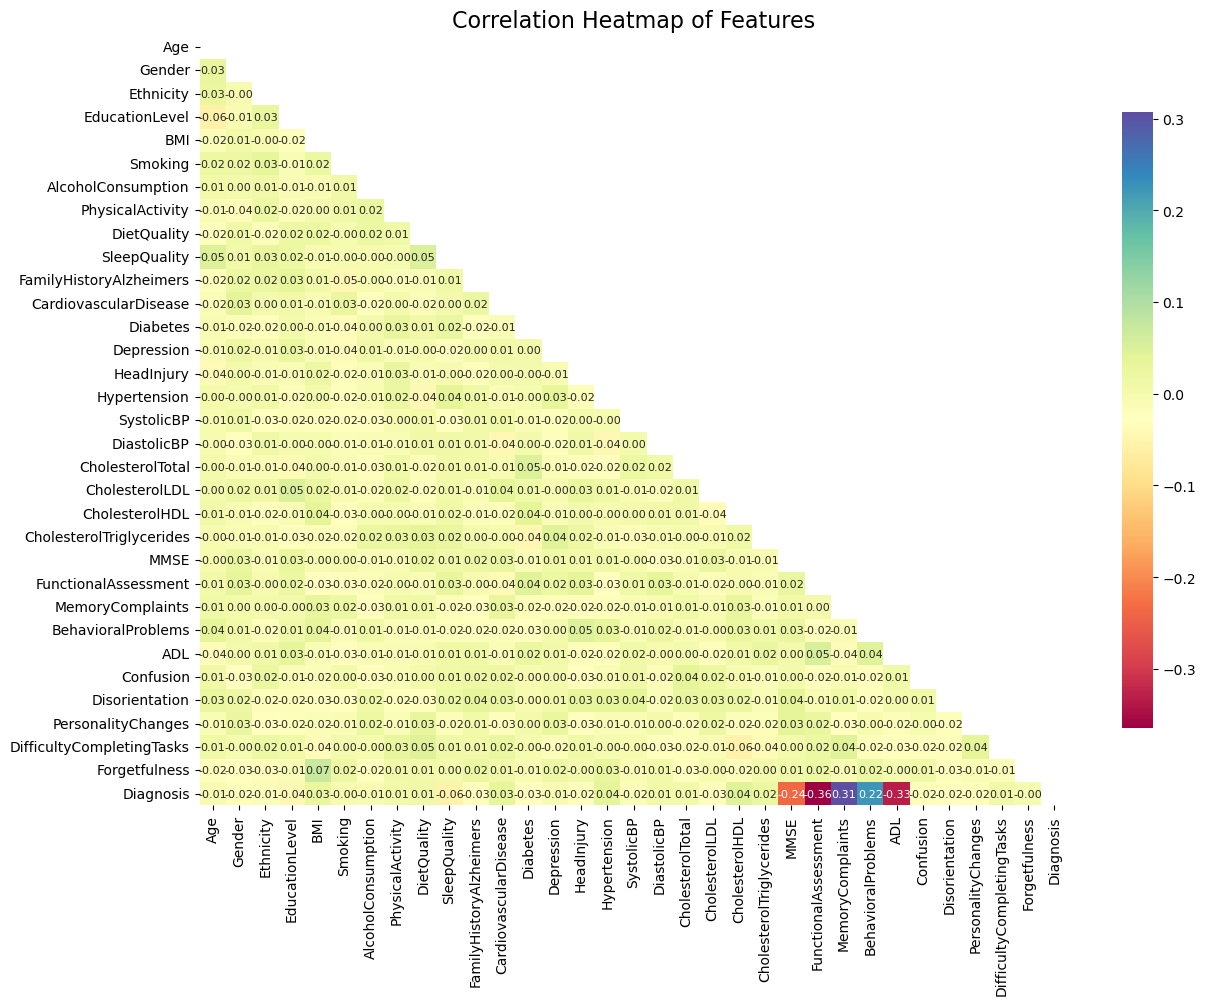

In [246]:
df.Ethnicity = df.Ethnicity.replace({"Caucasian": 0, "African American": 1, "Asian": 2, "Other": 3})

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(14, 10))
plt.title("Correlation Heatmap of Features", fontsize=16)
sns.heatmap(df.corr(), cmap=sns.color_palette("Spectral", as_cmap=True), annot=True, annot_kws={"size": 8},
            fmt=".2f", cbar_kws={"shrink": .8}, mask=mask)

plt.show()
df.Ethnicity = df.Ethnicity.replace({0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"})

---
# Feature Engineering
### Outlier Detection Analysis

When examining the boxplot for numerical values, we observe that the expectations set in the previous step are met, and **no outlier values** are detected. This confirms that the data distribution is clean and free of extreme values, making it suitable for further analysis without the need for additional outlier handling.

In [247]:
fig = px.box(df, y=numerical_columns, title="Outlier Detection in Numerical Columns", height=600, width=1000)
fig.show()

---
## Benchmarking & Feature Optimization

In this section, we aim to optimize our dataset by adding and removing features. Given that our target variable is **Diagnosis** (a binary target), **logistic regression** is a suitable choice for modeling in this phase. The logistic regression model will allow us to evaluate the impact of each feature on predicting the **Diagnosis** variable and help guide feature selection for improved model performance.

In [248]:
base_df = df.copy()
base_df_dummy =  pd.get_dummies(base_df, drop_first=True)
base_df_dummy.shape

(2149, 35)

In [249]:
logreg = LogisticRegression(max_iter = 10000, penalty = None)

X = base_df_dummy.drop("Diagnosis", axis=1)
y = base_df_dummy.Diagnosis

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Cross Validation
scores = cross_val_score(logreg, X_train, y_train, cv = 10, scoring = "accuracy")

# Test Performance
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

#Scores DataFrame Initializing
results = pd.DataFrame([], columns=["Accuracy Mean (CV)", "Accuracy Std (CV)", "Accuracy Test"])

#Adding scores and accuracy into results DF
results.loc["Base DF"] = [scores.mean(), scores.std(), accuracy]

In [250]:
results

,Accuracy Mean (CV),Accuracy Std (CV),Accuracy Test
Base DF,0.835951,0.026993,0.82093


The logistic regression model yielded a **cross-validation mean accuracy** of **83.6%** and a **test accuracy** of **82.1%**. The close alignment between the **CV mean** and **test accuracy** indicates that the model is generalizing well to unseen data, which is a positive sign for its robustness. The **low standard deviation (0.027)** from cross-validation further suggests that the model’s performance is consistent across different data splits. Moving forward, we aim to improve the accuracy score by exploring feature selection methods and other optimization techniques to enhance the model's predictive power.

### SMOTE Oversampler

Given that the **Diagnosis** target variable is distributed with approximately **64% Alzheimer Negative** and **36% Alzheimer Positive**, the **SMOTE oversampler** is applied to balance the classes and evaluate its impact on model performance. By oversampling the minority class, this approach aims to improve the model's ability to accurately predict Alzheimer-positive cases.

In [251]:
# Initialize and apply SMOTE oversampler
sampler = SMOTE()
X_train_sampled , y_train_sampled = sampler.fit_resample(X_train, y_train)

# Cross Validation
scores = cross_val_score(logreg, X_train_sampled, y_train_sampled, cv=10, scoring="accuracy")

# Test Performance
logreg.fit(X_train_sampled, y_train_sampled)
y_pred = logreg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

# Adding scores and accuracy into results DF
results.loc["Base DF (SMOTE)"] = [scores.mean(), scores.std(), accuracy]

In [252]:
results

,Accuracy Mean (CV),Accuracy Std (CV),Accuracy Test
Base DF,0.835951,0.026993,0.820930
Base DF (SMOTE),0.821359,0.028499,0.797674


- **CV Accuracy (Mean)**: SMOTE reduced cross-validation accuracy from **0.8359** to **0.8250**, indicating a slight negative impact on performance.
- **Test Accuracy**: The test accuracy decreased from **0.8209** to **0.7953**, suggesting poorer generalization on unseen data.
- **Standard Deviation**: The standard deviation of CV accuracy increased from **0.02699** to **0.03137**, showing greater variability and less consistent model performance.

SMOTE negatively affected both cross-validation and test accuracy, while also increasing performance variability.

In [253]:
y_train_sampled.value_counts()

Diagnosis
0    1111
1    1111
Name: count, dtype: int64

In [254]:
y_train.value_counts()

Diagnosis
0    1111
1     608
Name: count, dtype: int64

### Variance Treshold

In [255]:
# Initialize and apply VarianceThreshold selector
selector = VarianceThreshold(threshold=0.01)

X_train_selected = selector.fit_transform(X_train)
X_valid_selected = selector.transform(X_valid)

selected_columns = X_train.columns[selector.get_support()]
selected_columns

Index(['Age', 'Gender', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Ethnicity_Asian', 'Ethnicity_Caucasian',
       'Ethnicity_Other'],
      dtype='object')

In [256]:
selected_columns.shape

(34,)

In [257]:
X_train.shape

(1719, 34)

In [258]:
# Calculate the variance for each feature
variances = X_train.var()
print(variances)
print('\n' + '-'*50 + '\n')

# Check for features with variance below the threshold
low_variance_features = variances[variances < 0.01]
print(f"Low variance features (threshold < 0.01):\n{low_variance_features}")

Age                             81.358313
Gender                           0.250121
EducationLevel                   0.810933
BMI                             52.289397
Smoking                          0.206869
AlcoholConsumption              33.224387
PhysicalActivity                 8.133837
DietQuality                      8.481596
SleepQuality                     3.123103
FamilyHistoryAlzheimers          0.188262
CardiovascularDisease            0.119773
Diabetes                         0.129664
Depression                       0.161554
HeadInjury                       0.083514
Hypertension                     0.124767
SystolicBP                     672.507618
DiastolicBP                    303.390373
CholesterolTotal              1816.815193
CholesterolLDL                1865.697704
CholesterolHDL                 539.619547
CholesterolTriglycerides     10494.580138
MMSE                            73.736152
FunctionalAssessment             8.536624
MemoryComplaints                 0

The Variance Threshold did not remove any features, as all had sufficient variance above the threshold (0.01). This indicates that no features in the dataset are near-constant, and applying this method does not affect the model's performance.

Lowering the variance threshold further would likely not be useful, as it would retain features with almost no variability, which would not improve the model's performance. All features already contribute meaningful variability.

Thus, variance-based feature selection is not necessary for this dataset.

### Select K-Best

In [259]:
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X_train, y_train)

f_values = pd.Series(selector.scores_, index = X_train.columns)
f_values = f_values.sort_values(ascending=False)
f_values

FunctionalAssessment         257.318763
ADL                          219.327424
MemoryComplaints             199.616266
MMSE                         101.512032
BehavioralProblems            79.965086
SleepQuality                   5.240384
CholesterolHDL                 4.667156
Ethnicity_Asian                3.616504
CardiovascularDisease          3.306843
SystolicBP                     3.168299
CholesterolTriglycerides       2.863362
PersonalityChanges             2.680096
EducationLevel                 2.465476
Diabetes                       1.972211
FamilyHistoryAlzheimers        1.881800
BMI                            1.631851
Ethnicity_Other                1.591070
HeadInjury                     1.444267
Hypertension                   1.379410
CholesterolLDL                 1.105172
Disorientation                 1.064281
Ethnicity_Caucasian            0.515305
Age                            0.501021
DiastolicBP                    0.445395
DifficultyCompletingTasks      0.438932


In [260]:
best_accuracy = -np.inf

for k in range(2, X_train.shape[1]):
    best_columns = list(f_values[:k].index)
    X_train_selected = X_train[best_columns]
    scores = cross_val_score(logreg, X_train_selected, y_train, cv = 10)
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_k = k
        
print(f"best-k: {best_k}")
print(f"best_accuracy: {best_accuracy}")

best-k: 6
best_accuracy: 0.8493404052767579


In [261]:
k = 6
best_columns = list(f_values[:k].index)

X_train_selected = X_train[best_columns]
X_valid_selected = X_valid[best_columns]

print(X_train_selected.shape)

# Cross Validation
scores = cross_val_score(logreg, X_train_selected, y_train, cv=10, scoring="accuracy")

# Test Performance
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_valid_selected)
accuracy = accuracy_score(y_valid, y_pred)

# Adding scores and accuracy into results DF
results.loc["Select K-Best"] = [scores.mean(), scores.std(), accuracy]

(1719, 6)


In [262]:
results

,Accuracy Mean (CV),Accuracy Std (CV),Accuracy Test
Base DF,0.835951,0.026993,0.820930
Base DF (SMOTE),0.821359,0.028499,0.797674
Select K-Best,0.849340,0.023266,0.816279


### Recursive Feature Elimination (RFE)

In [263]:
selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=1)
selector.fit(X_train, y_train)
ranks = pd.Series(selector.ranking_, index = X_train.columns)
ranks = ranks.sort_values()
ranks

ADL                           1
MMSE                          2
FunctionalAssessment          3
MemoryComplaints              4
BehavioralProblems            5
DietQuality                   6
BMI                           7
SystolicBP                    8
SleepQuality                  9
CholesterolHDL               10
PhysicalActivity             11
CholesterolTriglycerides     12
CholesterolLDL               13
CholesterolTotal             14
Age                          15
AlcoholConsumption           16
EducationLevel               17
DiastolicBP                  18
Depression                   19
Hypertension                 20
FamilyHistoryAlzheimers      21
CardiovascularDisease        22
Smoking                      23
Confusion                    24
Diabetes                     25
HeadInjury                   26
Disorientation               27
PersonalityChanges           28
DifficultyCompletingTasks    29
Ethnicity_Asian              30
Ethnicity_Caucasian          31
Forgetfu

In [264]:
best_accuracy = -np.inf

for k in range(2, X_train.shape[1]):
    best_columns = list(ranks[:k].index)
    X_train_selected = X_train[best_columns]
    scores = cross_val_score(logreg, X_train_selected, y_train, cv = 10)
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_k = k

print(f"best-k: {best_k}")
print(f"best_accuracy: {best_accuracy}")

best-k: 7
best_accuracy: 0.8493404052767579


In [265]:
k = 7
best_columns = list(ranks[:k].index)

X_train_selected = X_train[best_columns]
X_valid_selected = X_valid[best_columns]

print(X_train_selected.shape)

# Cross Validation
scores = cross_val_score(logreg, X_train_selected, y_train, cv=10, scoring="accuracy")

# Test Performance
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_valid_selected)
accuracy = accuracy_score(y_valid, y_pred)

# Adding scores and accuracy into results DF
results.loc["RFE"] = [scores.mean(), scores.std(), accuracy]

(1719, 7)


In [266]:
results

,Accuracy Mean (CV),Accuracy Std (CV),Accuracy Test
Base DF,0.835951,0.026993,0.820930
Base DF (SMOTE),0.821359,0.028499,0.797674
Select K-Best,0.849340,0.023266,0.816279
RFE,0.849340,0.027029,0.816279


### Select From Model

In [267]:
rf_model = DecisionTreeClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importance = rf_model.feature_importances_
importance = pd.Series(importance, index=X_train.columns)
importance = importance.sort_values(ascending=False)
importance

MMSE                         0.234681
ADL                          0.199223
FunctionalAssessment         0.179969
MemoryComplaints             0.141484
BehavioralProblems           0.098925
BMI                          0.020421
DietQuality                  0.020320
SleepQuality                 0.016431
CholesterolHDL               0.015659
SystolicBP                   0.012197
PhysicalActivity             0.011437
CholesterolLDL               0.009441
CholesterolTriglycerides     0.006917
CholesterolTotal             0.006551
AlcoholConsumption           0.005500
Depression                   0.003030
Age                          0.002937
Ethnicity_Other              0.002545
Ethnicity_Caucasian          0.002262
Hypertension                 0.001909
CardiovascularDisease        0.001697
Smoking                      0.001697
DifficultyCompletingTasks    0.001272
FamilyHistoryAlzheimers      0.001272
HeadInjury                   0.001204
EducationLevel               0.000716
DiastolicBP 

In [268]:
best_accuracy = -np.inf

for k in range(2, X_train.shape[1]):
    best_columns = list(importance[:k].index)
    X_train_selected = X_train[best_columns]
    scores = cross_val_score(logreg, X_train_selected, y_train, cv=10, scoring="accuracy")
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_k = k

print(f"best-k: {best_k}")
print(f"best_accuracy: {best_accuracy}")

best-k: 9
best_accuracy: 0.8510811913504692


In [269]:
k = 9
best_columns = list(importance[:k].index)

X_train_selected = X_train[best_columns]
X_valid_selected = X_valid[best_columns]

print(X_train_selected.shape)

# Cross Validation
scores = cross_val_score(logreg, X_train_selected, y_train, cv=10, scoring="accuracy")

# Test Performance
logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_valid_selected)
accuracy = accuracy_score(y_valid, y_pred)

# Adding scores and accuracy into results DF
results.loc["Select From Model"] = [scores.mean(), scores.std(), accuracy]

(1719, 9)


In [270]:
results

,Accuracy Mean (CV),Accuracy Std (CV),Accuracy Test
Base DF,0.835951,0.026993,0.820930
Base DF (SMOTE),0.821359,0.028499,0.797674
Select K-Best,0.849340,0.023266,0.816279
RFE,0.849340,0.027029,0.816279
Select From Model,0.851081,0.029871,0.820930


### Principal Component Analysis

In [271]:
pca = PCA(n_components=10)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)

print(X_train_pca.shape)

# Cross Validation
scores = cross_val_score(logreg, X_train_pca, y_train, cv=10, scoring="accuracy")

# Test Performance
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_valid_pca)
accuracy = accuracy_score(y_valid, y_pred)

# Adding scores and accuracy into results DF
results.loc["PCA"] = [scores.mean(), scores.std(), accuracy]

(1719, 10)


In [272]:
results

,Accuracy Mean (CV),Accuracy Std (CV),Accuracy Test
Base DF,0.835951,0.026993,0.820930
Base DF (SMOTE),0.821359,0.028499,0.797674
Select K-Best,0.849340,0.023266,0.816279
RFE,0.849340,0.027029,0.816279
Select From Model,0.851081,0.029871,0.820930
PCA,0.628274,0.028385,0.623256


In [273]:
np.cumsum(pca.explained_variance_ratio_)

array([0.6571526 , 0.77406289, 0.8877681 , 0.92980937, 0.9634604 ,
       0.98244371, 0.98754387, 0.99215096, 0.99541019, 0.99747426])

### Feature Selection and Model Performance Comparison

The table above shows the performance of different feature selection techniques across several metrics. Based on the **cross-validation accuracy mean** and **test accuracy**, it is evident that the **Base DF** and **Select From Model** feature sets provide the most promising results.

- **Base DF** consists of 34 features and provides a cross-validation accuracy mean of **0.835951**, with a test accuracy of **0.820930**.
- **Select From Model** reduces the feature count to just **9 features** while maintaining a cross-validation accuracy mean of **0.851081**, and a test accuracy of **0.820930**.

Given the similar performance between these two approaches, a detailed comparison between **Base DF** (34 features) and **Select From Model** (9 features) will be conducted using different machine learning algorithms. The goal is to evaluate how these feature sets perform across a broader range of algorithms, ensuring the best balance between model complexity and predictive accuracy.

---
# Modelling

In [274]:
def get_scores(y_test, predicts):
    print("Accuracy: ", accuracy_score(y_test, predicts))
    print("Precision: ", precision_score(y_test, predicts))
    print("Recall: ", recall_score(y_test, predicts))

In [275]:
def display_conf_matrix(model_name: str, y_true, predictions):
    conf_matrix = confusion_matrix(y_true, predictions)
    cmdisplay = ConfusionMatrixDisplay(conf_matrix, display_labels=["Alzheimer", "Not Alzheimer"])

    cmdisplay.plot(cmap="viridis")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [276]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model_name, y_true, y_proba):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random performance)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

## Base DF Models

In [277]:
base_df_dummy =  pd.get_dummies(base_df, drop_first=True)
base_df_dummy.shape

(2149, 35)

In [278]:
base_df_dummy.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,...,1.725883,0,0,0,1,0,0,False,True,False
1,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,...,2.592424,0,0,0,0,1,0,False,True,False
2,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,...,7.119548,0,1,0,1,0,0,False,False,True
3,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,...,6.481226,0,0,0,0,0,0,False,True,False
4,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,...,0.014691,0,0,1,1,0,0,False,True,False


In [279]:
X = base_df_dummy.drop("Diagnosis", axis=1)
y = base_df_dummy.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1719, 34), (430, 34), (1719,), (430,))

In [280]:
# Initialize MinMaxScaler.
scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [281]:
# Base DF Accuracy Scores DataFrame Initializing
base_df_results = pd.DataFrame([], columns = ["Base DF Accuracy Scores"])

### Logistic Regression

In [282]:
logreg = LogisticRegression(max_iter=1000, penalty=None)
logreg.fit(X_train_scaled, y_train)
log_pred = logreg.predict(X_test_scaled)

base_df_results.loc["Logistic Regression"] = logreg.score(X_test_scaled, y_test) 
base_df_results

,Base DF Accuracy Scores
Logistic Regression,0.82093


In [283]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.75      0.74      0.75       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



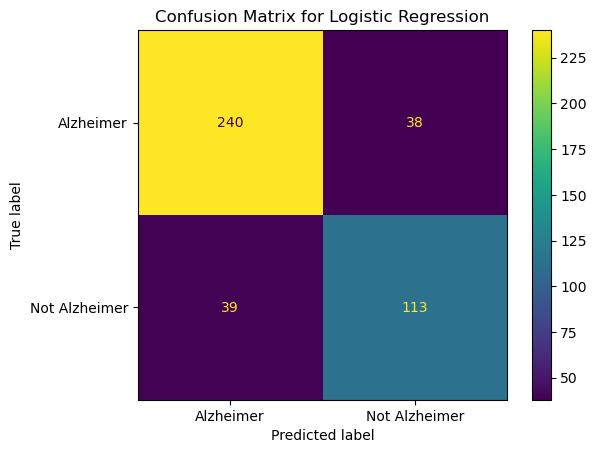

In [284]:
display_conf_matrix(model_name="Logistic Regression", y_true=y_test, predictions=log_pred)

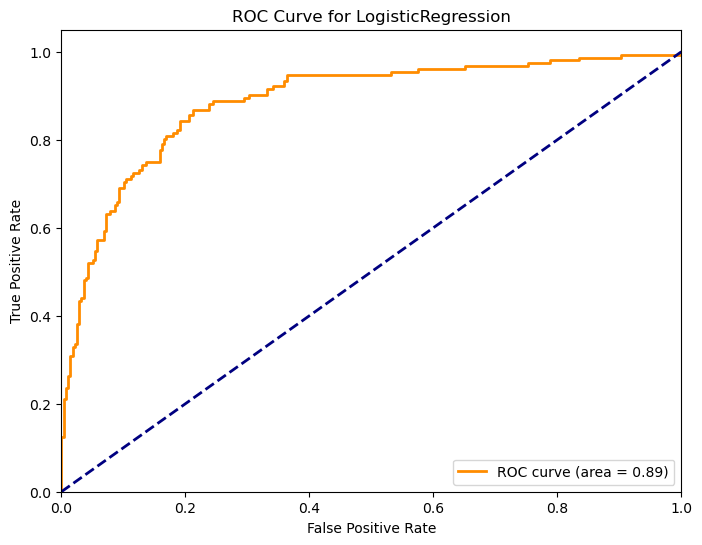

In [285]:
logreg_predict_proba = logreg.predict_proba(X_test_scaled)
logreg_proba =  logreg_predict_proba[:, 1]
plot_roc_curve("LogisticRegression", y_test, logreg_proba)

### K-Nearest Neighbor (KNN)

In [286]:
knn_results = []

for neighbor in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    knn_results.append({"Neighbor": neighbor, "Accuracy": accuracy})

knn_df = pd.DataFrame(knn_results)
knn_df = knn_df.sort_values(by="Accuracy", ascending=False)
knn_df


,Neighbor,Accuracy
11,13,0.725581
12,14,0.718605
9,11,0.709302
10,12,0.706977
8,10,0.700000
6,8,0.695349
7,9,0.693023
5,7,0.690698
4,6,0.688372
3,5,0.672093


In [287]:
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

base_df_results.loc["K-Nearest Neighbor"] = knn.score(X_test_scaled, y_test)
base_df_results


,Base DF Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.725581


In [288]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       278
           1       0.70      0.39      0.50       152

    accuracy                           0.73       430
   macro avg       0.72      0.65      0.66       430
weighted avg       0.72      0.73      0.70       430



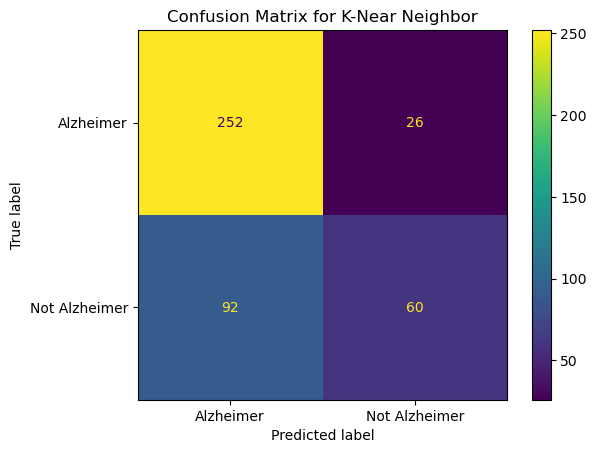

In [289]:
display_conf_matrix(model_name="K-Near Neighbor", y_true=y_test, predictions=knn_pred)

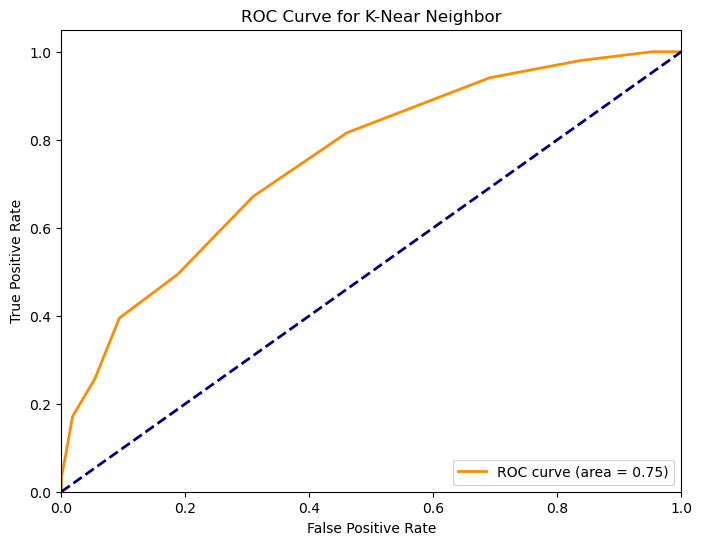

In [290]:
knn_predict_proba = knn.predict_proba(X_test_scaled)
knn_proba =  knn_predict_proba[:, 1]
plot_roc_curve("K-Near Neighbor", y_test, knn_proba)

### Naive Bayes Classifer

In [291]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

base_df_results.loc["Naive Bayes"] = nb.score(X_test_scaled, y_test)
base_df_results

,Base DF Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.725581
Naive Bayes,0.741860


In [292]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       278
           1       0.62      0.68      0.65       152

    accuracy                           0.74       430
   macro avg       0.72      0.73      0.72       430
weighted avg       0.75      0.74      0.74       430



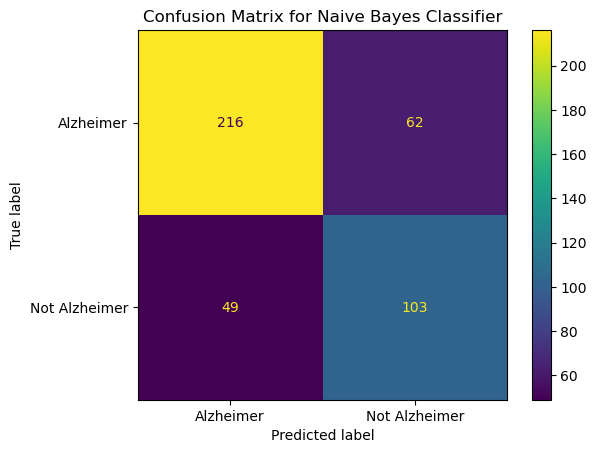

In [293]:
display_conf_matrix(model_name="Naive Bayes Classifier", y_true=y_test, predictions=nb_pred)

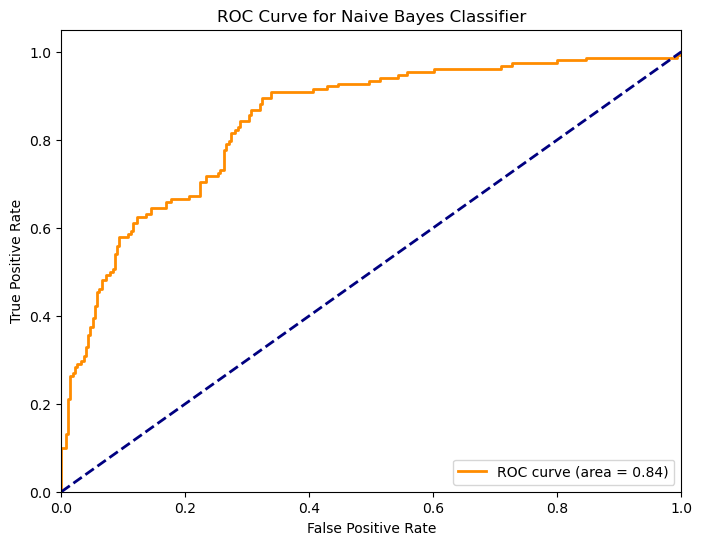

In [294]:
nb_predit_proba = nb.predict_proba(X_test_scaled)
nb_proba = nb_predit_proba[:, 1]
plot_roc_curve("Naive Bayes Classifier", y_test, nb_proba)

### Support Vector Machine

In [295]:
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)

base_df_results.loc["Support Vector Machine"] = svc.score(X_test_scaled, y_test)
base_df_results


,Base DF Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.725581
Naive Bayes,0.741860
Support Vector Machine,0.818605


In [296]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.75      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



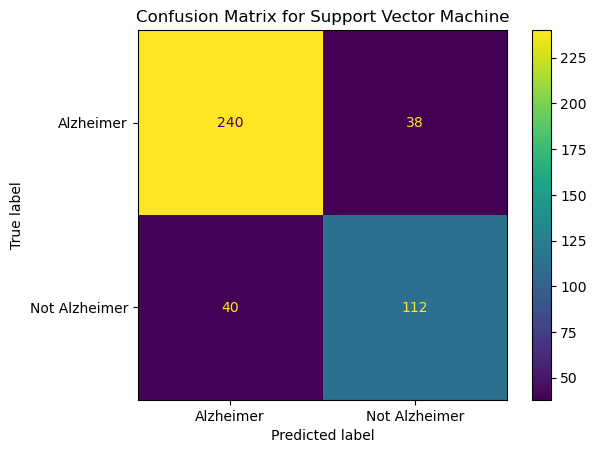

In [297]:
display_conf_matrix(model_name="Support Vector Machine", y_true=y_test, predictions=svc_pred)

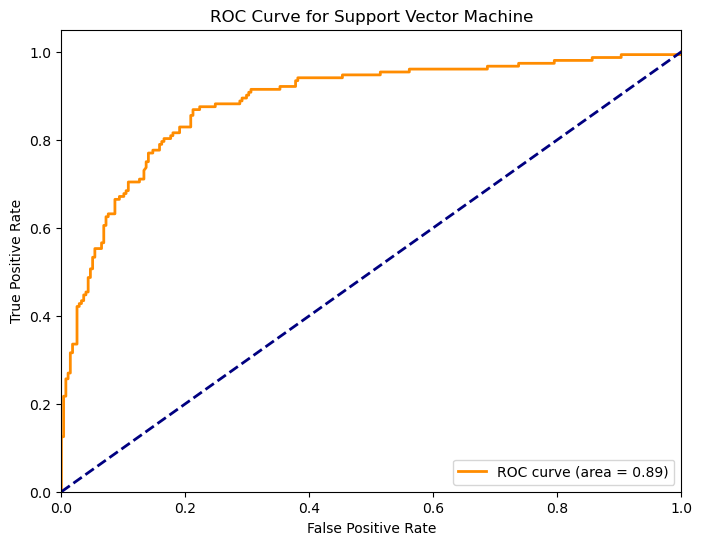

In [298]:
svc_predict_proba = svc.predict_proba(X_test_scaled)
svc_proba =  svc_predict_proba[:, 1]
plot_roc_curve("Support Vector Machine", y_test, svc_proba)

### Random Forest

In [299]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)

base_df_results.loc["Random Forest"] = rfc.score(X_test_scaled, y_test)
base_df_results

,Base DF Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.725581
Naive Bayes,0.741860
Support Vector Machine,0.818605
Random Forest,0.937209


In [300]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       278
           1       0.95      0.87      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



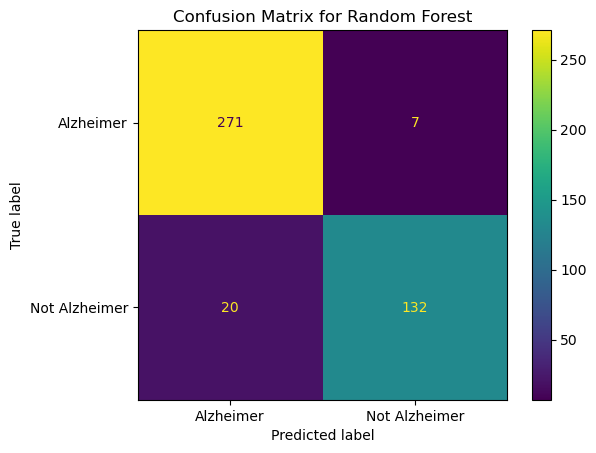

In [301]:
display_conf_matrix(model_name="Random Forest", y_true=y_test, predictions=rfc_pred)

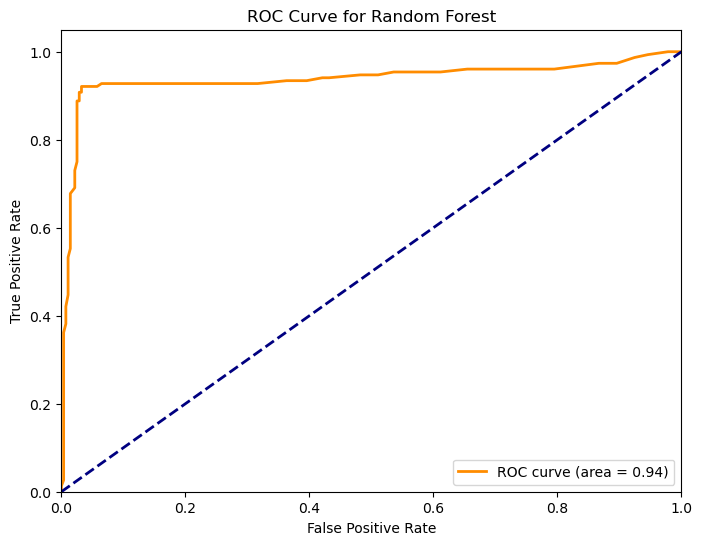

In [302]:
rfc_predict_proba = rfc.predict_proba(X_test_scaled)
rfc_proba =  rfc_predict_proba[:, 1]
plot_roc_curve("Random Forest", y_test, rfc_proba)

In [303]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

train_preds = rfc.predict(X_train_scaled)
test_preds = rfc.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9372093023255814


In [304]:
rfc = RandomForestClassifier(random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-validation Accuracy Mean:", rf_cv_scores.mean())
print("Cross-validation Accuracy Std:", rf_cv_scores.std())
print("Cross Validation Scores:", rf_cv_scores)

Cross-validation Accuracy Mean: 0.9348599211206311
Cross-validation Accuracy Std: 0.01341722017706061
Cross Validation Scores: [0.94186047 0.93023256 0.9244186  0.91860465 0.94186047 0.94767442
 0.93023256 0.9127907  0.94186047 0.95906433]


### XGBoost

In [305]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

base_df_results.loc["XGB Classifier"] = xgb.score(X_test_scaled, y_test)
base_df_results

,Base DF Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.725581
Naive Bayes,0.741860
Support Vector Machine,0.818605
Random Forest,0.937209
XGB Classifier,0.939535


In [306]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       278
           1       0.93      0.89      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.93       430
weighted avg       0.94      0.94      0.94       430



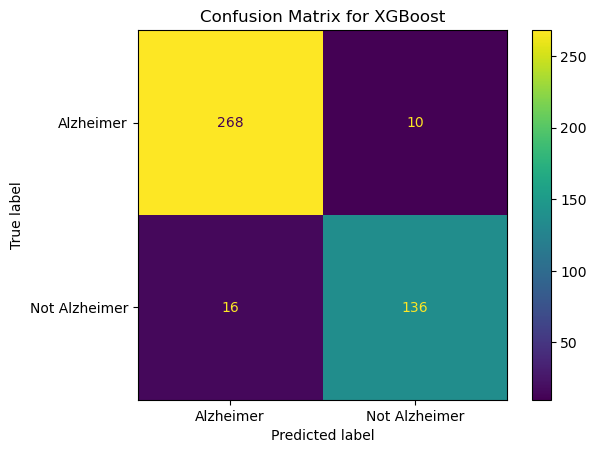

In [307]:
display_conf_matrix(model_name="XGBoost", y_true=y_test, predictions=xgb_pred)

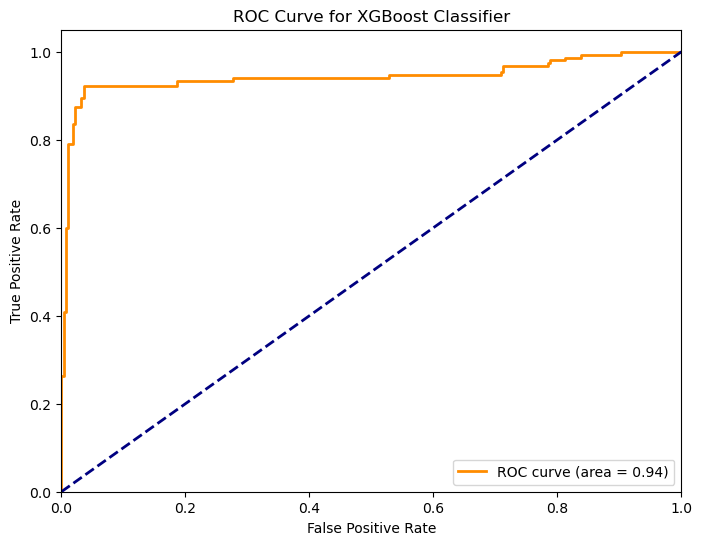

In [308]:
xgb_predict_proba = xgb.predict_proba(X_test_scaled)
xgb_proba =  xgb_predict_proba[:, 1]
plot_roc_curve("XGBoost Classifier", y_test, xgb_proba)

In [309]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

train_preds = xgb.predict(X_train_scaled)
test_preds = xgb.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9395348837209302


In [310]:
xgb = XGBClassifier(random_state=42)

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-validation Accuracy Mean:", xgb_cv_scores.mean())
print("Cross-validation Accuracy Std:", xgb_cv_scores.std())
print("Cross Validation Scores:", xgb_cv_scores)

Cross-validation Accuracy Mean: 0.9470692234462126
Cross-validation Accuracy Std: 0.015893436787633677
Cross Validation Scores: [0.96511628 0.95348837 0.94186047 0.94186047 0.95930233 0.94186047
 0.93023256 0.9127907  0.96511628 0.95906433]


## Select From Model Database

In [311]:
best_columns

['MMSE',
 'ADL',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'BMI',
 'DietQuality',
 'SleepQuality',
 'CholesterolHDL']

In [312]:
select_from_model_df =  df.loc[:, best_columns]
select_from_model_df.head()

,MMSE,ADL,FunctionalAssessment,MemoryComplaints,BehavioralProblems,BMI,DietQuality,SleepQuality,CholesterolHDL
0,21.463532,1.725883,6.518877,0,0,22.927749,1.347214,9.025679,33.682563
1,20.613267,2.592424,7.118696,0,0,26.827681,0.518767,7.151293,79.028477
2,7.356249,7.119548,5.895077,0,0,17.795882,1.826335,9.673574,69.772292
3,13.991127,6.481226,8.965106,0,1,33.800817,7.435604,8.392554,68.457491
4,13.517609,0.014691,6.045039,0,0,20.716974,0.795498,5.597238,56.874305


In [313]:
X = select_from_model_df
y = df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1719, 9), (430, 9), (1719,), (430,))

In [314]:
# Initialize MinMaxScaler.
scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [315]:
# Base DF Accuracy Scores DataFrame Initializing
sfm_df_results = pd.DataFrame([], columns=["SFM Accuracy Scores"])

### Logistic Regression

In [316]:
logreg = LogisticRegression(max_iter=1000, penalty=None)
logreg.fit(X_train_scaled, y_train)
log_pred = logreg.predict(X_test_scaled)

sfm_df_results.loc["Logistic Regression"] = logreg.score(X_test_scaled, y_test)
sfm_df_results

,SFM Accuracy Scores
Logistic Regression,0.82093


In [317]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.75      0.74      0.75       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



### K-Nearest Neighbor

In [318]:
knn_results = []

for neighbor in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    knn_results.append({"Neighbor": neighbor, "Accuracy": accuracy})

knn_df = pd.DataFrame(knn_results)
knn_df = knn_df.sort_values(by="Accuracy", ascending=False)
knn_df

,Neighbor,Accuracy
11,13,0.872093
7,9,0.869767
12,14,0.869767
9,11,0.867442
10,12,0.858140
5,7,0.855814
3,5,0.848837
8,10,0.848837
4,6,0.846512
6,8,0.841860


In [319]:
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

sfm_df_results.loc["K-Nearest Neighbor"] =  knn.score(X_test_scaled, y_test)
sfm_df_results

,SFM Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.872093


In [320]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       278
           1       0.84      0.79      0.81       152

    accuracy                           0.87       430
   macro avg       0.86      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430



### Naive Bayes Classifier

In [321]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

sfm_df_results.loc["Naive Bayes"] = nb.score(X_test_scaled, y_test)
sfm_df_results

,SFM Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.872093
Naive Bayes,0.765116


In [322]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       278
           1       0.66      0.68      0.67       152

    accuracy                           0.77       430
   macro avg       0.74      0.75      0.74       430
weighted avg       0.77      0.77      0.77       430



### Support Vector Classifier

In [323]:
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)

sfm_df_results.loc["Support Vector Machine"] = svc.score(X_test_scaled, y_test)
sfm_df_results

,SFM Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.872093
Naive Bayes,0.765116
Support Vector Machine,0.811628


In [324]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       278
           1       0.73      0.74      0.73       152

    accuracy                           0.81       430
   macro avg       0.79      0.79      0.79       430
weighted avg       0.81      0.81      0.81       430



### Random Forest

In [325]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)

sfm_df_results.loc["Random Forest"] = rfc.score(X_test_scaled, y_test)
sfm_df_results

,SFM Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.872093
Naive Bayes,0.765116
Support Vector Machine,0.811628
Random Forest,0.951163


In [326]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.94      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [327]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

train_preds = rfc.predict(X_train_scaled)
test_preds = rfc.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9511627906976744


In [328]:
rfc = RandomForestClassifier(random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-validation Accuracy Mean:", rf_cv_scores.mean())
print("Cross-validation Accuracy Std:", rf_cv_scores.std())
print("Cross Validation Scores:", rf_cv_scores)

Cross-validation Accuracy Mean: 0.9511457908336732
Cross-validation Accuracy Std: 0.01604924343301199
Cross Validation Scores: [0.95930233 0.95348837 0.93604651 0.94767442 0.97674419 0.95348837
 0.9244186  0.93023256 0.95930233 0.97076023]


### XGBoost

In [329]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

sfm_df_results.loc["XGB Classifier"] = xgb.score(X_test_scaled, y_test)
sfm_df_results

,SFM Accuracy Scores
Logistic Regression,0.820930
K-Nearest Neighbor,0.872093
Naive Bayes,0.765116
Support Vector Machine,0.811628
Random Forest,0.951163
XGB Classifier,0.951163


In [330]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.94      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [331]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

train_preds = xgb.predict(X_train_scaled)
test_preds = xgb.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9511627906976744


In [332]:
xgb = XGBClassifier(random_state=42)

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-validation Accuracy Mean:", xgb_cv_scores.mean())
print("Cross-validation Accuracy Std:", xgb_cv_scores.std())
print("Cross Validation Scores:", xgb_cv_scores)

Cross-validation Accuracy Mean: 0.9470692234462126
Cross-validation Accuracy Std: 0.01479186525619921
Cross Validation Scores: [0.95348837 0.95348837 0.93604651 0.93604651 0.96511628 0.95930233
 0.93023256 0.91860465 0.95930233 0.95906433]


## Model Comparison and Feature Selection Summary

In the previous steps, we compared the results obtained from two different datasets:
- **Base DF**, which included all features (34 in total).
- **Select From Model (SFM)**, where we selected the most important features based on feature importance scores (9 features).

The accuracy results for various models were very close between the two datasets. In some cases, using fewer features in the SFM approach resulted in equal or even slightly better performance. 

- **Base DF** provides a comprehensive dataset with all features included. However, this can increase computation time and may include features that add noise to the model.
- **SFM** uses fewer but more important features, resulting in more efficient models while maintaining or improving performance. This approach reduced model complexity without sacrificing accuracy.

- If the goal is to optimize model efficiency, reduce computation time, and increase interpretability, **Select From Model (SFM)** is the better approach. It performs well with fewer features and avoids the inclusion of irrelevant data.
- If you want to explore all features and their interactions, **Base DF** is still a valid choice, but it may lead to more complex models and longer computation times.

Given the minimal performance difference between the two approaches, proceeding with **SFM** is a logical step for building efficient and interpretable models. To further optimize performance, we will use **Grid Search Cross-Validation** with **Random Forest** and **XGB Classifier** models.

In [336]:
comparison_results_df = pd.concat([base_df_results, sfm_df_results], axis=1)
comparison_results_df

,Base DF Accuracy Scores,SFM Accuracy Scores
Logistic Regression,0.820930,0.820930
K-Nearest Neighbor,0.725581,0.872093
Naive Bayes,0.741860,0.765116
Support Vector Machine,0.818605,0.811628
Random Forest,0.937209,0.951163
XGB Classifier,0.939535,0.951163


## Finding Best Model and Parameters

In [345]:
X = select_from_model_df
y = df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1719, 9), (430, 9), (1719,), (430,))

In [378]:
# Defining the Pipeline
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Defining the parameter grid

param_grid = [
    {
        "classifier": [RandomForestClassifier(random_state=42)],
        "classifier__n_estimators": [50, 100, 150],
        "classifier__max_depth": [5, 10, 20],
        "classifier__min_samples_split": [2, 5],
        "classifier__min_samples_leaf": [1, 2],
        "classifier__bootstrap": [True, False]
    },

    {  
        "classifier": [XGBClassifier(random_state=42)],
        "classifier__n_estimators": [50, 100, 150],
        "classifier__learning_rate": [0.01, 0.1, 0.3],
        "classifier__max_depth": [3, 6, 10],
        "classifier__subsample": [0.8, 1],
        "classifier__colsample_bytree": [0.8, 1]
    }
]

# Finding best classifier model
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
best_model = grid_search.fit(X_train, y_train)
best_model.best_estimator_.get_params()["classifier"]

Fitting 5 folds for each of 180 candidates, totalling 900 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [379]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.94      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [380]:
accuracy_score(y_test, y_pred)

0.9511627906976744


### Model Performance:
The selected model (XGBoost) achieved the following key performance metrics on the test data:

- **Accuracy**: 95% - indicating the overall correctness of predictions.
- **Precision (Alzheimer positive - 1)**: 0.94 - 94% of cases predicted as positive were correct.
- **Recall (Alzheimer positive - 1)**: 0.92 - 92% of actual positive cases were successfully identified.
- **F1-Score (Alzheimer positive - 1)**: 0.93 - providing a balance between precision and recall.

For **Alzheimer negative (0)**, precision was 0.96 and recall was 0.97, which means the model is highly effective at identifying and predicting negative cases correctly.

- **Precision**: This metric reflects how many of the predicted Alzheimer's positive cases were truly positive. A value of 0.94 means that out of all patients predicted to have Alzheimer's, 94% were correctly identified.
- **Recall**: This metric indicates how well the model captures actual Alzheimer's positive cases. With a recall of 0.92, the model is detecting 92% of the true positive cases, but still missing 8%.
- **F1-Score**: The F1-score balances precision and recall, making it a good indicator of model performance when false negatives are critical. An F1-score of 0.93 suggests that the model is balanced in its ability to predict true positives without over-predicting them.

This analysis shows that the model, especially with hyperparameter tuning using **GridSearchCV**, performs well for both Alzheimer's positive and negative classifications. Although the accuracy is high, a focus on further improving recall for positive cases would be beneficial to ensure more patients with Alzheimer's are accurately detected.
